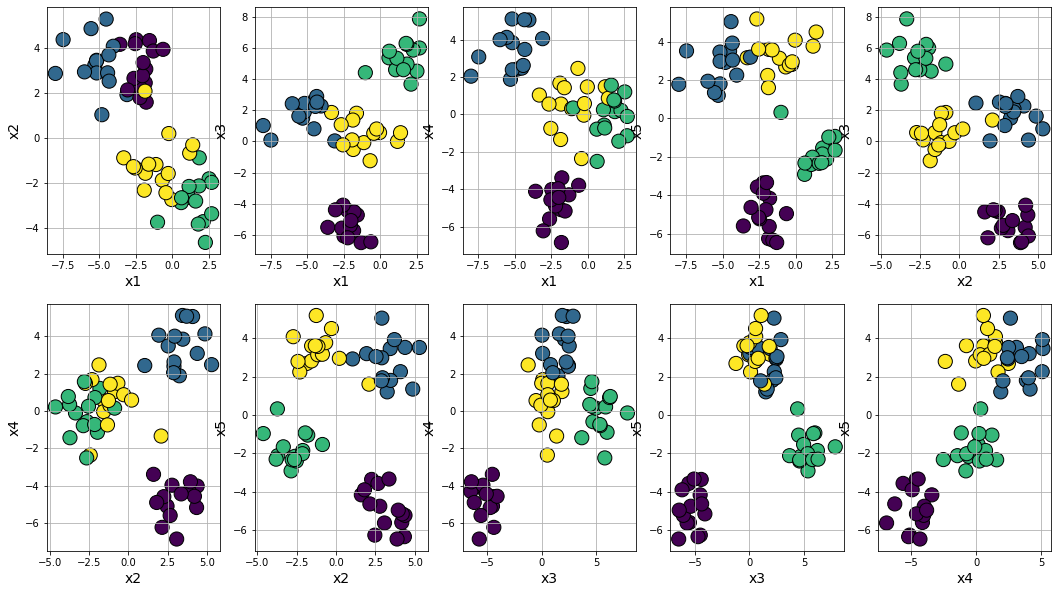

In [32]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

data = make_blobs(n_samples=60, n_features=5, centers=4, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,6)])
df['y'] = data[1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from itertools import combinations
from math import ceil
lst_var=list(combinations(df.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [50]:
df.shape

(60, 6)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df['y']], axis = 1)

In [34]:
pca.explained_variance_ratio_

array([0.55453518, 0.32394693])

Text(0, 0.5, 'principal component 2')

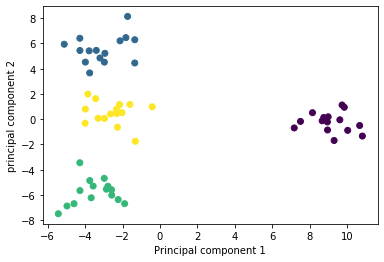

In [35]:
plt.scatter(finalDf.iloc[:, 0], finalDf.iloc[:, 1], c = df['y'],  )
plt.xlabel('Principal component 1')
plt.ylabel('principal component 2')

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(principalDf)
score = adjusted_rand_score(df['y'] , predict_labels)
score


1.0

[[1.    0.    0.003 ... 0.    0.    0.003]
 [0.    1.    0.169 ... 0.003 0.168 0.049]
 [0.    0.178 1.    ... 0.002 0.101 0.019]
 ...
 [0.    0.002 0.003 ... 1.    0.005 0.   ]
 [0.    0.167 0.1   ... 0.003 1.    0.02 ]
 [0.005 0.019 0.01  ... 0.    0.016 1.   ]]


(60, 60)

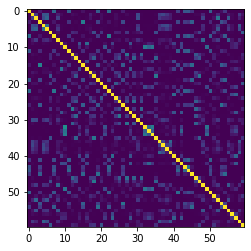

In [37]:
#With USPORF 
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)
sim_mat.shape

In [52]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components= 2)
principalComponents1 = pca1.fit_transform(sim_mat)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])

finalDf1 = pd.concat([principalDf1, df['y']], axis = 1)

In [53]:
finalDf1.shape

(60, 3)

Text(0, 0.5, 'principal component 2')

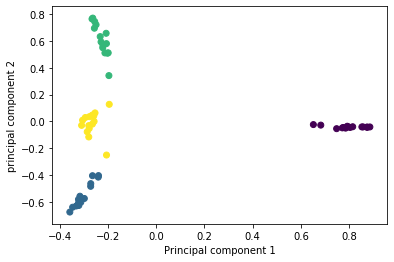

In [54]:
plt.scatter(finalDf1.iloc[:, 0], finalDf1.iloc[:, 1], c = df['y'],  )
plt.xlabel('Principal component 1')
plt.ylabel('principal component 2')

In [55]:
pca.explained_variance_ratio_

array([0.16549635, 0.13614134])

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(principalDf1)
score1 = adjusted_rand_score(df['y'] , predict_labels)
score1


0.9547725410377732